In [1]:
using DifferentialEquations
using SpecialFunctions
using Plots

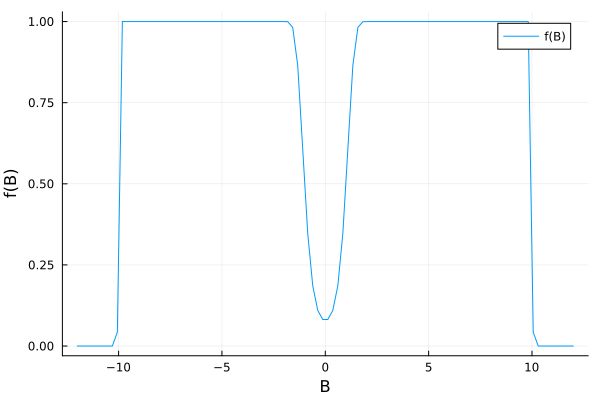

In [2]:
B_min = 1
B_max = 10

function f(B)
    return 1 / 4 * (1 .+ erf.(B .^ 2 .- B_min ^ 2)) .* (1 .- erf.(B .^ 2 .- B_max ^ 2))
end

B_values = range(-12, stop=12, length=100)

f_values = f(B_values)
plot(B_values, f_values, xlabel="B", ylabel="f(B)", label="f(B)")

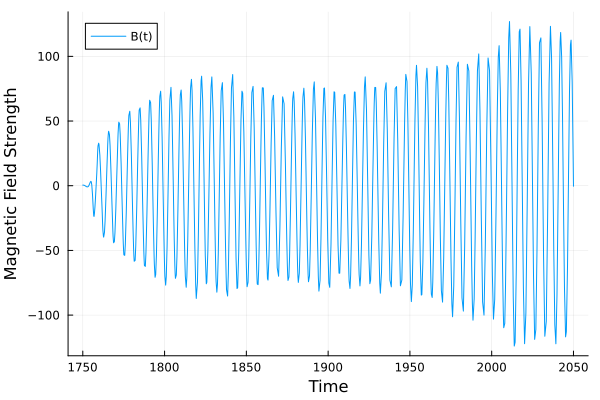

In [38]:
# Define parameters
N = 8.4  # Constant N
q = 0.82  # Delay q
p = [N, q]  # Parameter vector

#Initial Conditions
B0 = [0.5, 0, 0]
tspan = (1750.0, 2050.0)

#Define the problem
function MagneticField(du, u, h, p, t)
  N, q = p

  B = u[1]
  dB = u[2]
  ddB = u[3]
  du[1] = ddB
  du[2] = -2dB
  du[3] = - B - N * h(p, t - q)[1] * f(h(p, t - q)[1])
end

h(p, t) = [0.0, 0.0, 0.0]


prob = DDEProblem(MagneticField, B0, h, tspan, p)
sol = solve(prob, MethodOfSteps(Tsit5()))


plot(sol.t, sol[1, :], label = "B(t)", xlabel = "Time", ylabel = "Magnetic Field Strength", linewidth = 1)
#plot!(sol.t, sol[2, :], label="dB/dt", linewidth=2)
#plot!(sol.t, sol[3, :], label="d^2B/dt^2", linewidth=2)